<a href="https://colab.research.google.com/github/amitdamri/FastAI-Repo/blob/main/DroneOrBirdClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [2]:
# Example of what ddg returns
results = search_images_ddg("flying bird")
results

(#200) ['https://wallup.net/wp-content/uploads/2016/01/185433-nature-birds-wings-trees-flying-red-depth_of_field.jpg','https://4.bp.blogspot.com/-ff-mBN6Vud8/WPutpwLDyGI/AAAAAAAArxM/jaCriVChTF8WMf48BlmFSnTPRJLcgu9kgCLcB/s1600/ibisFlorida%2B2017%2Bpart%2B2_20170321_2113%2Bcopy.jpg','https://coronadotimes.com/wp-content/uploads/2019/03/birds-flying-3.png','https://images.pexels.com/photos/1553463/pexels-photo-1553463.jpeg?auto=compress&cs=tinysrgb&fit=crop&h=627&w=1200','https://imagefinder.co/storage/w1000/images/2019/03/pixabay_seagull-4046612_960_720.jpg','https://www.worldatlas.com/upload/b5/0b/74/bergdohle-1513973-640.jpg','https://2.bp.blogspot.com/-pfTTQ4KUZ1c/UN3nV48YWTI/AAAAAAAAJUg/hVHU0wIn7Yw/s1600/sunrise-with-flying-birds.jpg','https://wallup.net/wp-content/uploads/2018/10/06/192212-water-flying-birds.jpg','https://tailandfur.com/wp-content/uploads/2017/07/birds-captured-in-extreme-flying-mode-15.jpg','https://images.fineartamerica.com/images-medium-large/high-flying-bird-tho

In [3]:
def download_categorie_images(path, categories):
  """downloads images from each given category"""
  if not path.exists():
    path.mkdir()
  for c in categories:
    dest = (path/c)
    dest.mkdir(exist_ok = True)
    results = search_images_ddg(f"flying {c}")
    download_images(dest, urls = results)

In [4]:
# set the category and download
categories = ["drone", "bird"]
path = Path('Drone and Bird')
download_categorie_images(path, categories)

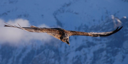

In [5]:
# Let us see one example
fns = get_image_files(path)
img = Image.open(fns[-1])
img.to_thumb(128,128)

In [6]:
# looks good but we have to make sure that all the images are okay
failed = verify_images(fns)
print(f"Number of failed images: {len(failed)}")
failed.map(Path.unlink)

Number of failed images: 8


(#8) [None,None,None,None,None,None,None,None]

In [7]:
# Create a datablock to prepare the data for train and validation
flyings = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

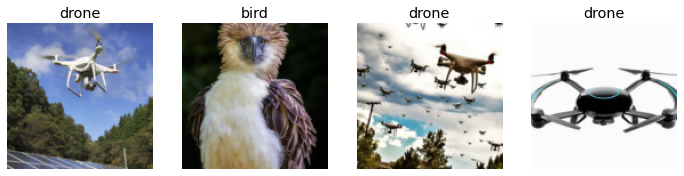

In [8]:
# get the dataloaders and show 4 images
def show_batch(dab, path, max_n = 4, nrows = 1, unique = False):
  dls = dab.dataloaders(path)
  dls.train.show_batch(max_n = max_n, nrows = nrows, unique = unique)

show_batch(flyings, path)

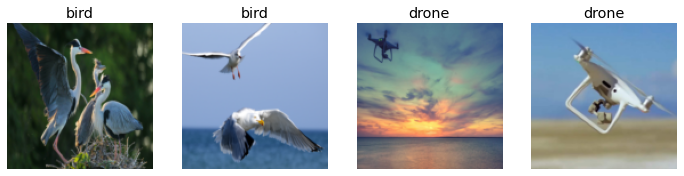

In [9]:
# change the resize action
flyings = flyings.new(item_tfms = Resize(128, ResizeMethod.Squish))
show_batch(flyings, path)

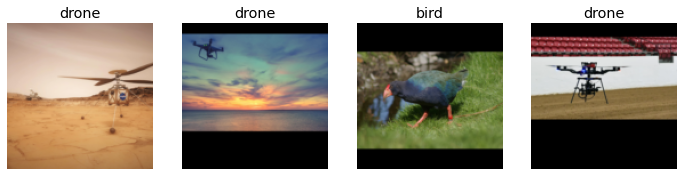

In [10]:
# change the resize action
flyings = flyings.new(item_tfms = Resize(128, ResizeMethod.Pad, pad_mode = 'zeros'))
show_batch(flyings, path)

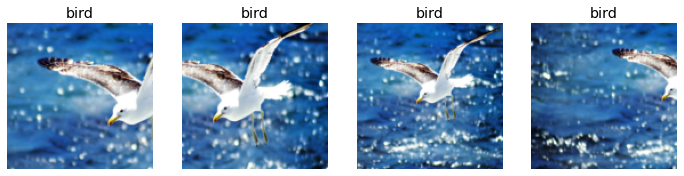

In [11]:
# change the resize action
flyings = flyings.new(item_tfms = RandomResizedCrop(128, min_scale = 0.3))
show_batch(flyings, path, unique = True)

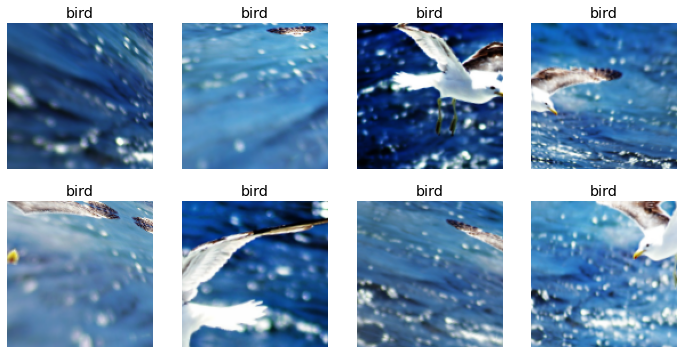

In [12]:
# data augmentation
flyings = flyings.new(item_tfms = RandomResizedCrop(128), batch_tfms = aug_transforms(mult = 2))
show_batch(flyings, path, max_n = 8, nrows = 2, unique = True)

Train the model

In [13]:
flyings = flyings.new(item_tfms = RandomResizedCrop(224, min_scale = 0.5), batch_tfms = aug_transforms())
dls = flyings.dataloaders(path)
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should b

Interpret the results

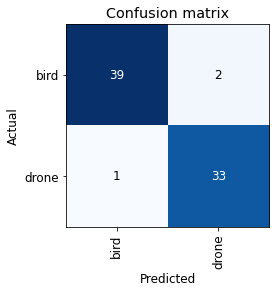

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

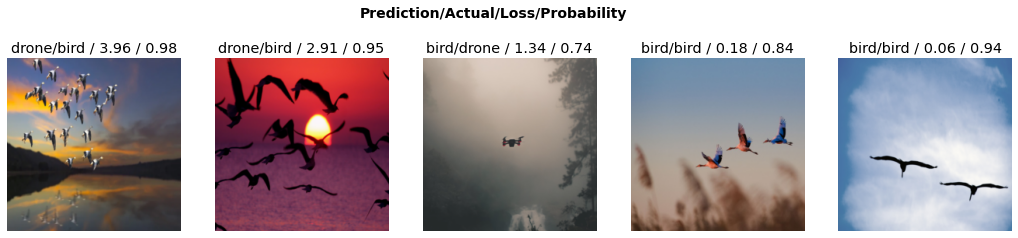

In [22]:
interp.plot_top_losses(5, nrows = 1, figsize = (18, 4))

Clean data

In [23]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
# remove dirty images
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# change category
for idx, c in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/c)

Export the model

In [27]:
learn.export("model.pkl")

In [29]:
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('model.pkl')]

In [31]:
learn_inf = load_learner(path/'model.pkl')
learn_inf.predict("Drone and Bird/drone/2bfca9ac-9ca7-4fa2-9ebf-6cb6711542cf.jpg")

('drone', TensorBase(1), TensorBase([0.0708, 0.9292]))

In [33]:
learn_inf.dls.vocab

['bird', 'drone']